# Vectorized Backtest

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pathlib import Path
from time import time
import datetime

import numpy as np
import pandas as pd
import pandas_datareader.data as web

from scipy.stats import spearmanr

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
np.random.seed(42)

## Load Data

### Return Predictions

In [4]:
#DATA_DIR = Path('..', '/12_gradient_boosting_machines/')

In [5]:
#DATA_DIR

In [6]:
#data = pd.read_hdf('00_data/backtest.h5', 'data')
#data.info()

In [8]:


# Lee el archivo hdf
store = pd.HDFStore('data/predictions.h5')

# Obtiene las claves
keys = store.keys()

# Cierra el archivo hdf
store.close()

# Imprime las claves
print(keys)


['/lgb/train/01', '/lgb/test/01']


In [9]:
#tomamos los resultados de las 10 mejores configuraciones de los predictores
predictions = (pd.read_hdf('../12_gradient_boosting_machines/data/predictions.h5', 'lgb/train/01')
                   .append(pd.read_hdf('../12_gradient_boosting_machines/data/predictions.h5', 'lgb/test/01').drop('y_test', axis=1)))
#tomamos la media
predictions = (predictions.loc[~predictions.index.duplicated()]#si se duplican indices tomara los del train, ose los primeros
                   .iloc[:, :10]
                   .mean(1)
                   .sort_index()
                   .dropna()
                  .to_frame('prediction'))
tickers = predictions.index.get_level_values('ticker').unique().tolist()#modificado ticker por symbol


FileNotFoundError: File ../12_gradient_boosting_machines/data/predictions.h5 does not exist

In [476]:
datos_train=(pd.read_hdf('../12_gradient_boosting_machines/data/predictions.h5', 'lgb/train/01'))
datos_test=pd.read_hdf('../12_gradient_boosting_machines/data/predictions.h5', 'lgb/test/01')

In [477]:
#fin del train
datos_train.sort_index().loc['XLY.US'].tail(1)

,0,1,2,3,4,5,6,7,8,9
date,,,,,,,,,,
2018-12-31,0.001123,-0.001053,-0.001053,-0.000422,-0.000422,-0.004199,-0.004199,0.004746,-0.000264,-0.063795


In [478]:
#comienzo del test
datos_test.sort_index().loc['XLY.US'].head(1)

,y_test,0,1,2,3,4,5,6,7,8,9
date,,,,,,,,,,,
2019-02-28,0.036626,0.007278,0.009812,0.009812,0.007566,0.007566,0.009051,0.009051,0.009826,0.005926,0.0295


In [479]:
#prueba = (pd.read_hdf('../12_gradient_boosting_machines/data/predictions.h5', 'lgb/train/01')
#                   .append(pd.read_hdf('../12_gradient_boosting_machines/data/predictions.h5', 'lgb/test/01').drop('y_test', axis=1)))

In [480]:
#prueba.sort_index().loc['XLY.US'].loc['2015'].tail(4)

In [481]:
datos_test.loc['XLY.US'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2023-01-31 to 2019-02-28
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_test  48 non-null     float64
 1   0       48 non-null     float64
 2   1       48 non-null     float64
 3   2       48 non-null     float64
 4   3       48 non-null     float64
 5   4       48 non-null     float64
 6   5       48 non-null     float64
 7   6       48 non-null     float64
 8   7       48 non-null     float64
 9   8       48 non-null     float64
 10  9       48 non-null     float64
dtypes: float64(11)
memory usage: 4.5 KB


In [482]:
predictions

prediction
ticker date                  
IYR.US 2013-01-31    0.013002
       2013-02-28    0.004970
       2013-03-31    0.012809
       2013-04-30    0.015249
       2013-05-31    0.013250
...                       ...
XLY.US 2022-09-30    0.018443
       2022-10-31    0.000487
       2022-11-30   -0.022006
       2022-12-31   -0.026821
       2023-01-31    0.008950

[1440 rows x 1 columns]

In [483]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1440 entries, ('IYR.US', Timestamp('2013-01-31 00:00:00')) to ('XLY.US', Timestamp('2023-01-31 00:00:00'))
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   prediction  1440 non-null   float64
dtypes: float64(1)
memory usage: 19.6+ KB


In [484]:
# assets = bundle.asset_finder.lookup_symbols(tickers, as_of_date=None)

predicciones=(predictions
            .unstack('ticker')
            .prediction)
            

In [485]:
predicciones['2019']

ticker,IYR.US,SPY.US,VOX.US,XLB.US,XLE.US,XLF.US,XLI.US,XLK.US,XLP.US,XLU.US,XLV.US,XLY.US
date,,,,,,,,,,,,
2019-02-28,0.008155,0.006330,0.009510,0.008531,0.006833,0.009454,0.006751,0.011309,0.006649,0.006328,0.009971,0.010539
2019-03-31,0.014612,0.018739,0.018086,0.016227,0.019469,0.018674,0.017493,0.019248,0.017382,0.018103,0.016789,0.018124
2019-04-30,0.000355,0.001947,0.000583,0.001018,0.000288,-0.000487,-0.000446,0.001920,0.001175,0.005065,0.002379,-0.001466
2019-05-31,0.000839,-0.000405,-0.001667,0.001118,0.002857,-0.002585,0.003531,0.001517,0.000333,0.000130,0.001065,0.001377
2019-06-30,-0.012140,-0.019434,-0.016624,-0.020614,-0.018197,-0.019434,-0.018537,-0.019057,-0.017693,-0.015534,-0.018424,-0.018687
2019-07-31,-0.004445,-0.003820,-0.006496,-0.002358,-0.001305,-0.007654,-0.003243,-0.008352,-0.004328,-0.001619,-0.004978,-0.004745
2019-08-31,0.007380,0.008619,0.009758,0.008112,0.015319,0.011070,0.010579,0.010411,0.007240,0.007281,0.006378,0.006869
2019-09-30,0.002329,0.001159,0.000996,-0.000940,0.001323,-0.001231,-0.000235,0.000422,0.001514,0.001431,0.000035,0.001690
2019-10-31,0.015479,0.013431,0.010048,0.012274,0.013674,0.010625,0.013016,0.016973,0.015239,0.015159,0.008586,0.013244


In [486]:
predicciones.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2013-01-31 to 2023-01-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IYR.US  120 non-null    float64
 1   SPY.US  120 non-null    float64
 2   VOX.US  120 non-null    float64
 3   XLB.US  120 non-null    float64
 4   XLE.US  120 non-null    float64
 5   XLF.US  120 non-null    float64
 6   XLI.US  120 non-null    float64
 7   XLK.US  120 non-null    float64
 8   XLP.US  120 non-null    float64
 9   XLU.US  120 non-null    float64
 10  XLV.US  120 non-null    float64
 11  XLY.US  120 non-null    float64
dtypes: float64(12)
memory usage: 12.2 KB


### SP500 Benchmark

In [487]:
#sp500 = web.DataReader('SP500', 'fred', '2014', '2018').pct_change()

In [488]:
#sp500.info()

## Compute Forward Returns

In [489]:
#tomamos los datos

In [490]:
DATA_STORE = '../data/assets.h5'

In [491]:
idx = pd.IndexSlice

In [492]:
with pd.HDFStore(DATA_STORE) as store:
    data = (store['engineered_features']
            .sort_index()
            .loc[idx[:, :'2023'], :])

In [493]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2556 entries, ('IYR.US', Timestamp('2006-02-28 00:00:00')) to ('XLY.US', Timestamp('2023-10-31 00:00:00'))
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   return_1m                  2556 non-null   float64
 1   return_2m                  2556 non-null   float64
 2   return_3m                  2556 non-null   float64
 3   return_6m                  2556 non-null   float64
 4   return_9m                  2556 non-null   float64
 5   return_12m                 2556 non-null   float64
 6   Mkt-RF                     2556 non-null   float64
 7   SMB                        2556 non-null   float64
 8   HML                        2556 non-null   float64
 9   RMW                        2556 non-null   float64
 10  CMA                        2556 non-null   float64
 11  momentum_2                 2556 non-null   float64
 12  momentum_3           

In [494]:
#localizamos target_1m para las fechas y tickers de predictions
fwd_returns = (data.loc[idx[predictions.index.get_level_values('ticker').unique(),
               predictions.index.get_level_values('date').unique()],:]
               .sort_index(ascending=False))

In [495]:
fwd_returns

return_1m  return_2m  return_3m  return_6m  return_9m  \
ticker date                                                                
XLY.US 2023-01-31   0.139950   0.008617   0.010693  -0.014672  -0.009585   
       2022-12-31  -0.116371  -0.053027  -0.032119  -0.010006  -0.038666   
       2022-11-30   0.014858   0.012973  -0.019752  -0.008510  -0.020659   
       2022-10-31   0.011092  -0.036611  -0.039401  -0.019570  -0.026763   
       2022-09-30  -0.082063  -0.063694   0.012613  -0.041923  -0.038715   
...                      ...        ...        ...        ...        ...   
IYR.US 2013-05-31  -0.065033  -0.005731   0.005634   0.016401   0.008320   
       2013-04-30   0.057333   0.042947   0.032724   0.026852   0.016230   
       2013-03-31   0.028757   0.020636   0.027119   0.016338   0.012541   
       2013-02-28   0.012579   0.026301   0.027283   0.009665   0.015232   
       2013-01-31   0.040210   0.034715   0.021013   0.008082   0.008987   

                   return_12m    Mkt-RF       SMB       HML       RMW  ...  \
ticker date                                                            ...   
XLY.US 2023-01-31   -0.017531  1.093979 -0.272359 -0.118529 -0.186411  ...   
       2022-12-31   -0.037071  1.048809 -0.315616 -0.144352 -0.180676  ...   
       2022-11-30   -0.026973  1.052624 -0.340614 -0.174299 -0.126867  ...   
       2022-10-31   -0.026849  1.094666 -0.275649 -0.162206 -0.066460  ...   
       2022-09-30   -0.018447  1.107978 -0.265031 -0.172267 -0.055718  ...   
...                       ...       ...       ...       ...       ...  ...   
IYR.US 2013-05-31    0.012824  1.012774  0.341890  0.430524  0.613811  ...   
       2013-04-30    0.014870  0.943991  0.658334  0.216077  0.576406  ...   
       2013-03-31    0.012306  1.005112  0.334757  0.279491  0.467413  ...   
       2013-02-28    0.013632  0.992535  0.359899  0.271477  0.426439  ...   
       2013-01-31    0.011993  1.036124  0.183199  0.192542  0.293759  ...   

                   sentiment  empleo  inflacion  recession_diff  \
ticker date                                                       
XLY.US 2023-01-31       64.9     3.4   6.554492             0.0   
       2022-12-31       59.8     3.5   6.617223             0.0   
       2022-11-30       56.7     3.6   6.471178             0.0   
       2022-10-31       59.9     3.7   6.364809             0.0   
       2022-09-30       58.6     3.5   6.392795             0.0   
...                      ...     ...        ...             ...   
IYR.US 2013-05-31       84.5     7.5   1.907797             0.0   
       2013-04-30       76.4     7.6   1.935432             0.0   
       2013-03-31       78.6     7.5   2.099902             0.0   
       2013-02-28       77.6     7.7   2.146017             0.0   
       2013-01-31       73.8     8.0   2.068297             0.0   

                   yield_curve_diff  financial_conditions_diff  leverage_diff  \
ticker date                                                                     
XLY.US 2023-01-31              0.00                    0.00000        0.00000   
       2022-12-31              0.15                   -0.03143       -0.12155   
       2022-11-30             -0.57                   -0.06723       -0.04374   
       2022-10-31             -0.62                   -0.03994       -0.04695   
       2022-09-30              0.31                    0.13732       -0.02448   
...                             ...                        ...            ...   
IYR.US 2013-05-31              0.47                    0.01145       -0.01835   
       2013-04-30             -0.15                   -0.04651        0.00329   
       2013-03-31              0.02                   -0.01928       -0.00068   
       2013-02-28             -0.17                   -0.00573       -0.00137   
       2013-01-31              0.22                   -0.04666       -0.05455   

                   sentiment_diff  empleo_diff  inflacion_diff  
ticker date             

In [496]:
#daily_returns = data.open.unstack('ticker').sort_index().pct_change()
#daily_returns.info()

In [497]:
fwd_returns = fwd_returns.target_1m.unstack('ticker').sort_index()

In [498]:
#si queremos comparar contra benchmark o no
sp500=fwd_returns['SPY.US'].shift(1)
#sp500=fwd_returns['XLU.US'].shift(1)*0

In [499]:
#eliminamos SPY
#fwd_returns.drop('SPY.US', axis=1, inplace=True)
fwd_returns.head()

ticker,IYR.US,SPY.US,VOX.US,XLB.US,XLE.US,XLF.US,XLI.US,XLK.US,XLP.US,XLU.US,XLV.US,XLY.US
date,,,,,,,,,,,,
2013-01-31,0.012579,0.012779,-0.007758,-0.013676,0.004431,0.012210,0.021995,0.007810,0.032843,0.023009,0.012487,0.016113
2013-02-28,0.028757,0.038019,0.034599,0.022224,0.025454,0.038846,0.023735,0.025624,0.049556,0.053764,0.063609,0.043598
2013-03-31,0.057333,0.019185,0.082605,0.009370,-0.013084,0.026744,-0.007365,0.017839,0.029212,0.059692,0.028903,0.030449
2013-04-30,-0.065033,0.023719,-0.037312,0.018897,0.028517,0.061072,0.050095,0.027853,-0.021574,-0.090460,0.016210,0.027664
2013-05-31,-0.014495,-0.013395,0.021122,-0.041024,-0.022711,-0.015509,-0.015365,-0.029048,-0.003070,0.008752,-0.005748,0.008121


In [500]:

media = fwd_returns.mean(axis=1).shift(1)
media.name = 'mediasec'

In [501]:
sp500

date
2013-01-31         NaN
2013-02-28    0.012779
2013-03-31    0.038019
2013-04-30    0.019185
2013-05-31    0.023719
                ...   
2022-09-30   -0.092436
2022-10-31    0.081276
2022-11-30    0.055592
2022-12-31   -0.061936
2023-01-31    0.062887
Name: SPY.US, Length: 120, dtype: float64

## Generate Signals

In [502]:
#predictions = data.predicted.unstack('ticker')
#predictions.info()

In [503]:
#eliminamos SPY si comparamos con benchmark
#predicciones.drop('SPY.US', axis=1, inplace=True)
predicciones

ticker,IYR.US,SPY.US,VOX.US,XLB.US,XLE.US,XLF.US,XLI.US,XLK.US,XLP.US,XLU.US,XLV.US,XLY.US
date,,,,,,,,,,,,
2013-01-31,0.013002,0.013214,0.014954,0.013025,0.014329,0.011279,0.010897,0.013438,0.014541,0.016534,0.012794,0.011773
2013-02-28,0.004970,0.004779,0.006768,0.008655,0.005331,0.005117,0.003919,0.005769,0.002644,0.003688,0.005128,0.004132
2013-03-31,0.012809,0.013034,0.015976,0.015680,0.014299,0.012666,0.012150,0.014504,0.013526,0.014469,0.014621,0.012082
2013-04-30,0.015249,0.014463,0.015845,0.015539,0.017309,0.013725,0.016324,0.015180,0.014675,0.018151,0.014609,0.014160
2013-05-31,0.013250,0.005383,0.011545,0.006662,0.007456,0.002490,0.005462,0.009894,0.010953,0.012901,0.005655,0.004407
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,0.012648,0.023231,0.020559,0.015911,0.018876,0.021114,0.023322,0.024603,0.006174,0.014885,0.012927,0.018443
2022-10-31,-0.002036,-0.007756,-0.010791,-0.008710,-0.003795,-0.011127,-0.000348,-0.004431,0.009289,-0.006176,-0.004350,0.000487
2022-11-30,-0.017768,-0.016739,-0.017375,-0.015301,-0.011401,-0.015394,-0.016584,-0.018118,-0.017211,-0.013375,-0.014630,-0.022006


In [504]:
N_LONG = N_SHORT = 4

In [505]:
long_signals = ((predicciones
                .where(predicciones > 0)
                .rank(axis=1, ascending=False) < N_LONG)
                .astype(int))
short_signals = ((predicciones
                  .where(predicciones < 0)
                  .rank(axis=1) < N_SHORT)
                 .astype(int))

## Compute Portfolio Returns

In [506]:
long_returns = long_signals.mul(fwd_returns).replace(0, np.nan).mean(axis=1).fillna(0)
short_returns = short_signals.mul(-fwd_returns).replace(0, np.nan).mean(axis=1).fillna(0)
strategy = long_returns.add(short_returns).to_frame('Strategy')

In [507]:
short_signals.loc['2019':].describe()

ticker,IYR.US,SPY.US,VOX.US,XLB.US,XLE.US,XLF.US,XLI.US,XLK.US,XLP.US,XLU.US,XLV.US,XLY.US
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.041667,0.104167,0.166667,0.083333,0.104167,0.270833,0.125000,0.062500,0.083333,0.125000,0.083333,0.083333
std,0.201941,0.308709,0.376622,0.279310,0.308709,0.449093,0.334219,0.244623,0.279310,0.334219,0.279310,0.279310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [508]:
short_signals.loc['2019':].sum()

ticker
IYR.US     2
SPY.US     5
VOX.US     8
XLB.US     4
XLE.US     5
XLF.US    13
XLI.US     6
XLK.US     3
XLP.US     4
XLU.US     6
XLV.US     4
XLY.US     4
dtype: int64

In [509]:
long_signals.loc['2019':].describe()

ticker,IYR.US,SPY.US,VOX.US,XLB.US,XLE.US,XLF.US,XLI.US,XLK.US,XLP.US,XLU.US,XLV.US,XLY.US
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.187500,0.104167,0.187500,0.166667,0.291667,0.229167,0.229167,0.312500,0.125000,0.104167,0.083333,0.270833
std,0.394443,0.308709,0.394443,0.376622,0.459340,0.424744,0.424744,0.468417,0.334219,0.308709,0.279310,0.449093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [510]:
long_signals.loc['2019':].sum()

ticker
IYR.US     9
SPY.US     5
VOX.US     9
XLB.US     8
XLE.US    14
XLF.US    11
XLI.US    11
XLK.US    15
XLP.US     6
XLU.US     5
XLV.US     4
XLY.US    13
dtype: int64

## Plot results

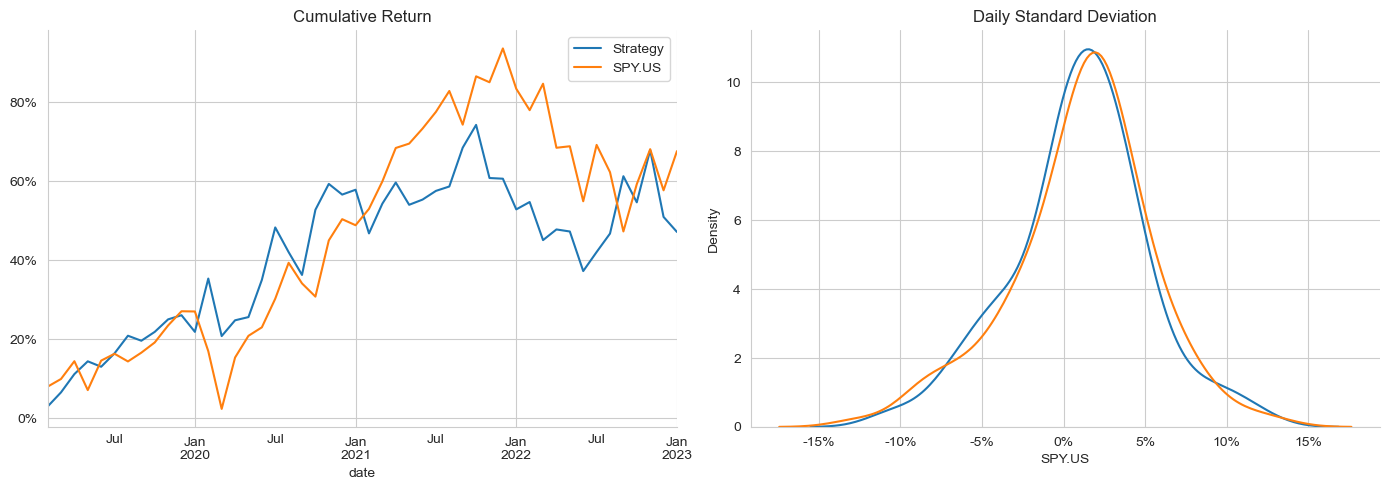

In [511]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
strategy.loc['2019':].join(sp500).add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')
#strategy.join(sp500).add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')
sns.distplot(strategy.dropna(), ax=axes[1], hist=False, label='Strategy')
sns.distplot(sp500, ax=axes[1], hist=False, label='SP500')
axes[1].set_title('Daily Standard Deviation')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
sns.despine()
fig.tight_layout();

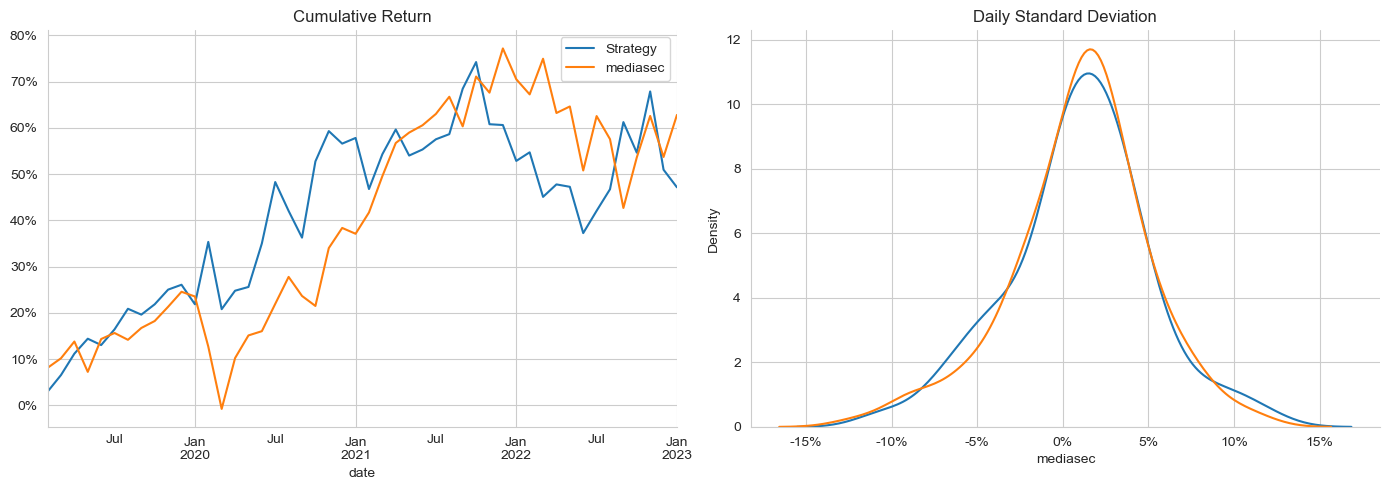

In [512]:
#en vez de s&P, la media
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
strategy.loc['2019':].join(media).add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')
sns.distplot(strategy.dropna(), ax=axes[1], hist=False, label='Strategy')
sns.distplot(media, ax=axes[1], hist=False, label='media')
axes[1].set_title('Daily Standard Deviation')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
sns.despine()
fig.tight_layout();

In [513]:
res = strategy.join(sp500).dropna()

In [514]:
res.std()

Strategy    0.041543
SPY.US      0.042883
dtype: float64

<Axes: xlabel='date'>

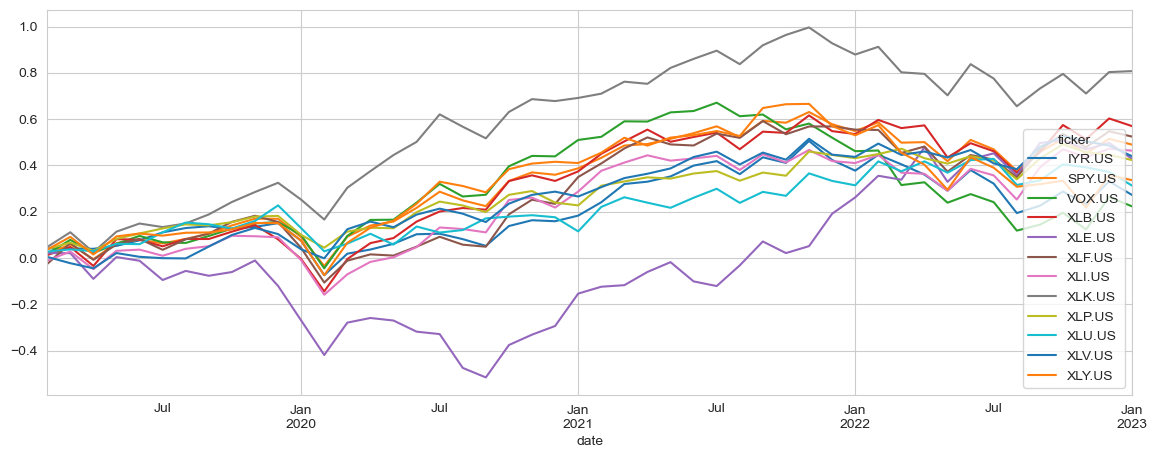

In [515]:
fwd_returns.loc['2019':].cumsum().plot(figsize=(14,5))

solo largos

In [516]:
#sólo largos
strategy_long = long_returns.to_frame('Strategy')

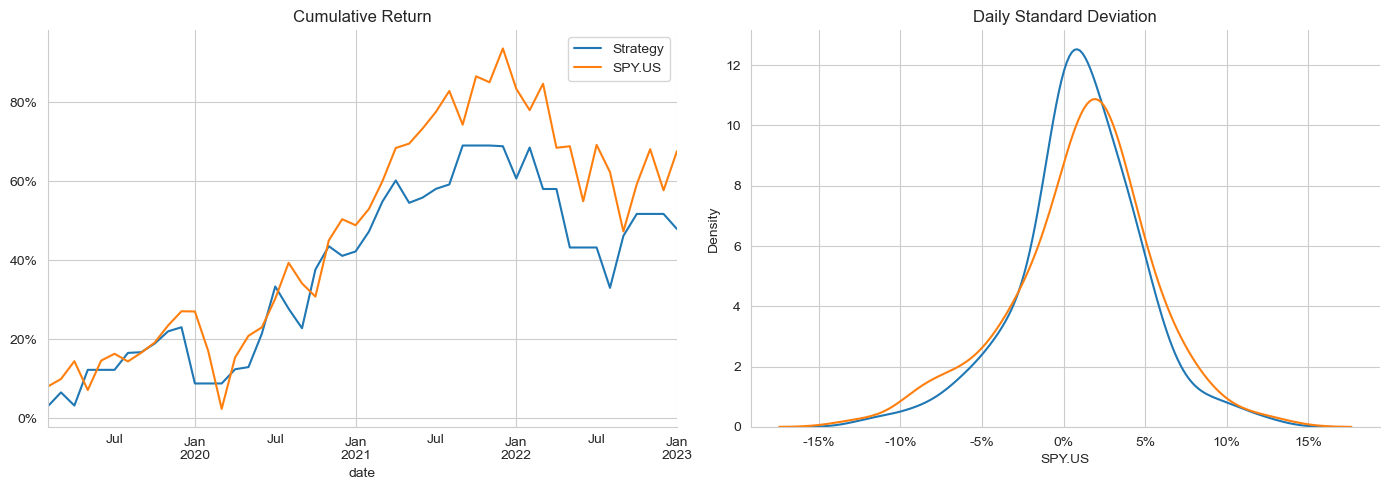

In [517]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
strategy_long.loc['2019':].join(sp500).add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')
sns.distplot(strategy_long.dropna(), ax=axes[1], hist=False, label='Strategy')
sns.distplot(sp500, ax=axes[1], hist=False, label='SP500')
axes[1].set_title('Daily Standard Deviation')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
sns.despine()
fig.tight_layout();

solo cortos

In [518]:
#sólo CORTOS
strategy_short = short_returns.to_frame('Strategy')

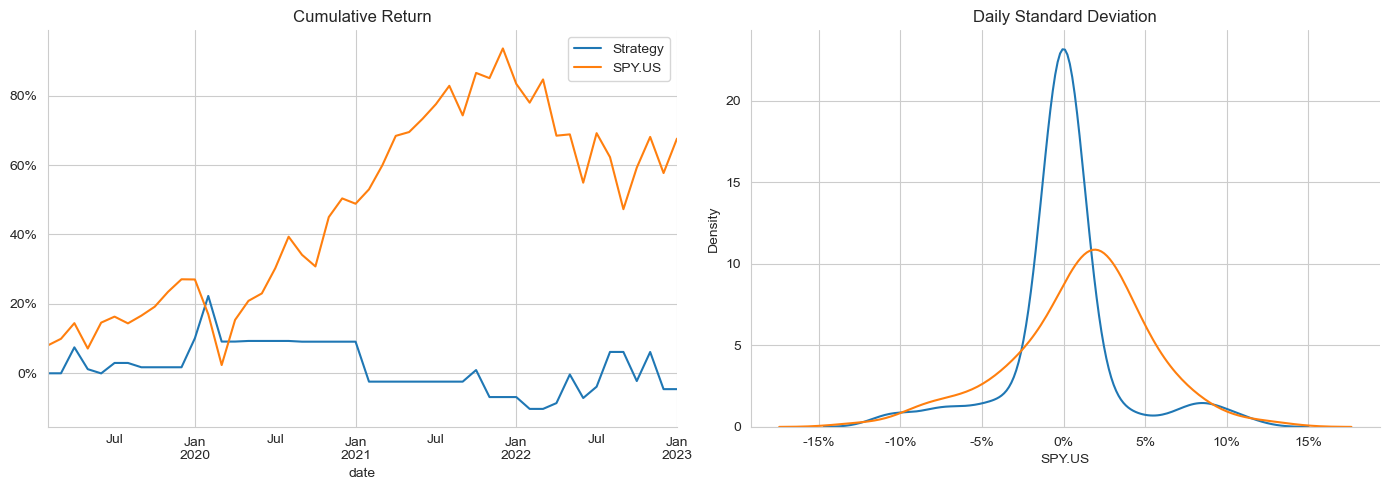

In [519]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
strategy_short.loc['2019':].join(sp500).add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')
sns.distplot(strategy_short.dropna(), ax=axes[1], hist=False, label='Strategy')
sns.distplot(sp500, ax=axes[1], hist=False, label='SP500')
axes[1].set_title('Daily Standard Deviation')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
sns.despine()
fig.tight_layout();